# Parte 2
#### Michelle Mejía y Silvia Illescas

## Escenario 1
Un país con una cobertura de vacunación contra la COVID-19 del 60% observa un aumento del Rₜ de 0.8 a 1.5 tras la aparición de una nueva variante.

¿Cuáles son los dos factores que probablemente causaron este aumento?


1. Aparición de una variante más transmisible:
Las nuevas variantes pueden tener mutaciones que aumentan su capacidad de infectar, elevando el valor de 𝛽, lo cual incrementa directamente el número efectivo de reproducción 𝑅t =β/γ⋅S, donde S es la proporción de susceptibles.

2. Disminución de la inmunidad o cobertura insuficiente:
Aunque hay una cobertura del 60%, eso no alcanza el umbral de inmunidad para variantes con alto R₀. Además, puede haber disminución de la inmunidad con el tiempo o desigualdad en la distribución de la vacunación, lo que permite nuevos brotes en ciertas zonas o grupos.


- Intervención económica y no económica para reducir el Rₜ

Intervención económica:
→ Incentivos por vacunación o refuerzo (como subsidios o bonos). Esto podría aumentar la cobertura, especialmente en sectores indecisos.

Intervención no económica:
→ Campañas informativas y refuerzo del uso de mascarillas/distanciamiento. Este tipo de intervención cambia el comportamiento sin usar dinero, reduciendo los contactos efectivos y, por ende, 𝛽.

## Escenario 2
Tasa de vacunación contra el VPH: 40%. Asistencia escolar: 80%.
¿Qué es más eficaz: un mandato escolar o clínicas móviles gratuitas?

Análisis basado en:
1. Umbral de inmunidad colectiva
Sabemos que el R₀ del VPH ≈ 4, por lo tanto:

Cobertura necesaria = 0.75
Actualmente hay un 40% de vacunación, lo cual está muy por debajo del umbral.

2. Evaluación de intervenciones:

a) Mandato escolar

Solo puede aplicarse al 80% de la población (los que asisten a la escuela). Si se exige vacunación para ingresar, en teoría se podría vacunar hasta ese 80%.
Pero hay limitantes: objeciones de padres, problemas legales, etc.

b) Clínicas móviles gratuitas

Podrían llegar a toda la población, escolar y no escolar. Si se implementan bien, podrían aumentar la cobertura en zonas remotas o vulnerables.


-> Uso de teoría de juegos


En contextos sin obligación (vacuna voluntaria), muchos individuos pueden elegir no vacunarse, esperando beneficiarse de la inmunidad colectiva.
Un mandato escolar cambia el equilibrio: ahora los estudiantes no tienen la opción de no vacunarse si quieren seguir asistiendo, obligando a más cooperación. Las clínicas móviles no cambian las reglas, pero reducen barreras de acceso, lo cual incentiva de forma más suave y no coercitiva.



- Aunque ambas medidas ayudan, el mandato escolar es más eficaz a corto plazo si la asistencia escolar es alta. Pero para llegar al umbral poblacional (>75%), una combinación de ambas políticas sería ideal: Mandato escolar para aprovechar el porcentaje escolarizado y Clínicas móviles para alcanzar al restante

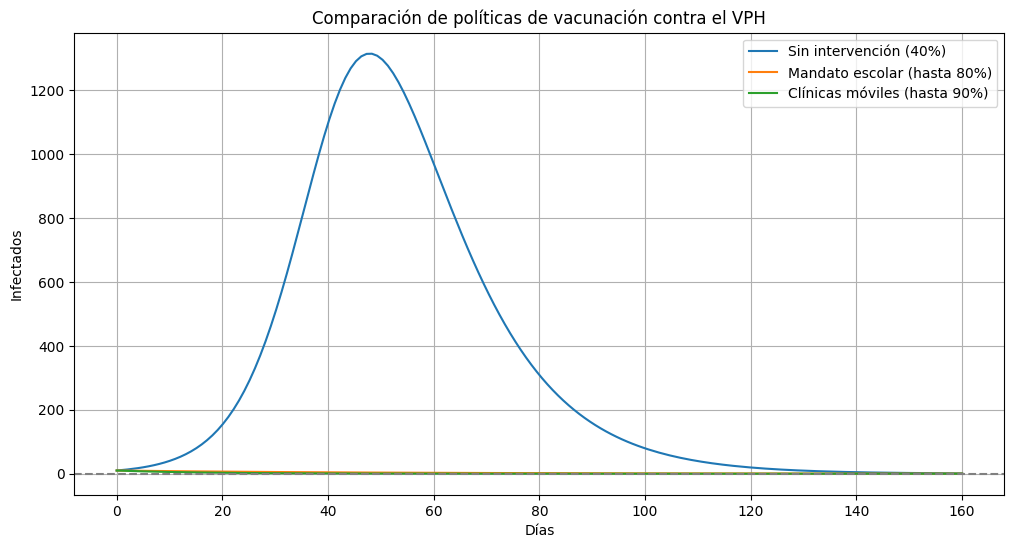

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Población total
N = 10000
I0 = 10
t = np.linspace(0, 160, 160)

# Parámetros del VPH
R0 = 4
gamma = 0.1
beta = R0 * gamma

def sir(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Escenarios
escenarios = {
    "Sin intervención (40%)": 0.40,
    "Mandato escolar (hasta 80%)": 0.80,
    "Clínicas móviles (hasta 90%)": 0.90
}

results = {}

for nombre, vac_frac in escenarios.items():
    R0_ini = vac_frac * N
    S0 = N - I0 - R0_ini
    y0 = [S0, I0, R0_ini]
    
    sol = odeint(sir, y0, t, args=(beta, gamma))
    S, I, R = sol.T
    results[nombre] = (S, I, R)

# Gráficos
plt.figure(figsize=(12, 6))
for nombre in escenarios:
    _, I, _ = results[nombre]
    plt.plot(t, I, label=nombre)

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.title("Comparación de políticas de vacunación contra el VPH")
plt.legend()
plt.grid()
plt.show()


La simulación muestra que con una cobertura de vacunación del 40% (sin intervención), la propagación del VPH genera un brote significativo, alcanzando más de 1,200 personas infectadas al mismo tiempo. En cambio, con un mandato escolar que eleva la vacunación al 80%, el brote se reduce drásticamente, casi desapareciendo. Finalmente, con clínicas móviles que permiten alcanzar un 90% de cobertura, el control es aún más efectivo. Estos resultados confirman que superar el umbral de inmunidad colectiva (75% para el VPH) es clave para evitar epidemias, y que las políticas que facilitan o exigen la vacunación tienen un impacto directo en la salud pública.


El último prompt utilizado fue: **“¿Cómo podría simular el escenario 2 en Python?”**. Este funcionó porque me permitió obtener una simulación extra a los requerimientos y adecuada del modelo SIR con distintos niveles de cobertura de vacunación. Además pude comparar los tres escenarios: sin intervención (40%), mandato escolar (80%) y clínicas móviles (90%). Al superar el umbral de inmunidad colectiva (75%), el modelo mostró una reducción drástica en los contagios, confirmando que las políticas de vacunación tienen un impacto directo en el control de enfermedades como el VPH.
